# Test of left-join vs inner-join crossmatch plan

The `.compute()` isn't working yet, but the idea here is to validate the expected pixel output.

In [2]:
import lsdb

Use a larger segment for the left catalog.  This one will have 3 partitions.

In [9]:
gaia3_sm = lsdb.open_catalog(
    "https://data.lsdb.io/hats/gaia_dr3",
    columns=["source_id", "ra", "dec", "parallax", "phot_g_n_obs", "phot_g_mean_mag"],
    search_filter=lsdb.ConeSearch(280, 0, radius_arcsec=2900)
)                                                                                                                 
gaia3_sm

Dask NestedFrame Structure:
                          source_id               ra              dec         parallax    phot_g_n_obs phot_g_mean_mag
npartitions=3                                                                                                         
2129921148769533952  int64[pyarrow]  double[pyarrow]  double[pyarrow]  double[pyarrow]  int16[pyarrow]  float[pyarrow]
2135832123280457728             ...              ...              ...              ...             ...             ...
2139209823000985600             ...              ...              ...              ...             ...             ...
2140335722907828224             ...              ...              ...              ...             ...             ...
Dask Name: search_points, 5 expressions
Expr=MapPartitions(search_points)

The right catalog will only have 1 partition.

In [10]:
ztf22_sm = lsdb.open_catalog(
    "https://data.lsdb.io/hats/ztf_dr22",
    columns=["objectid", "objra", "objdec", "nepochs", "hmjd", "mag", "magerr"],
    search_filter=lsdb.ConeSearch(280, 0, radius_arcsec=36)
)
ztf22_sm = ztf22_sm.nest_lists(
    list_columns=["hmjd", "mag", "magerr"],
    name="lc")
ztf22_sm

Dask NestedFrame Structure:
                           objectid           objra          objdec         nepochs                                                     lc
npartitions=1                                                                                                                             
2136183967001346048  int64[pyarrow]  float[pyarrow]  float[pyarrow]  int64[pyarrow]  nested<hmjd: [double], mag: [float], magerr: [float]>
2136254335745523712             ...             ...             ...             ...                                                    ...
Dask Name: lambda, 6 expressions
Expr=MapPartitions(lambda)

How do each of these catalogs cover their part of the sky?

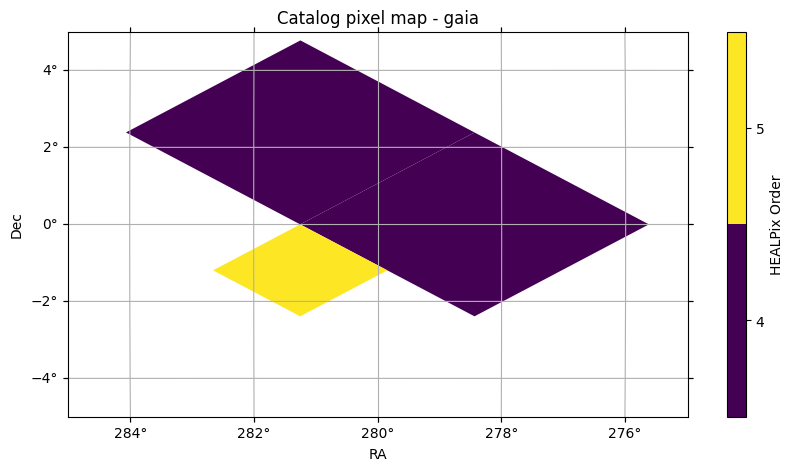

In [11]:
import astropy.units as u
from astropy.coordinates import SkyCoord

fov = (10 * u.deg, 10 * u.deg)
center = SkyCoord(280 * u.deg, 0 * u.deg)
fig, ax = gaia3_sm.plot_pixels(projection="AIT", fov=fov, center=center)

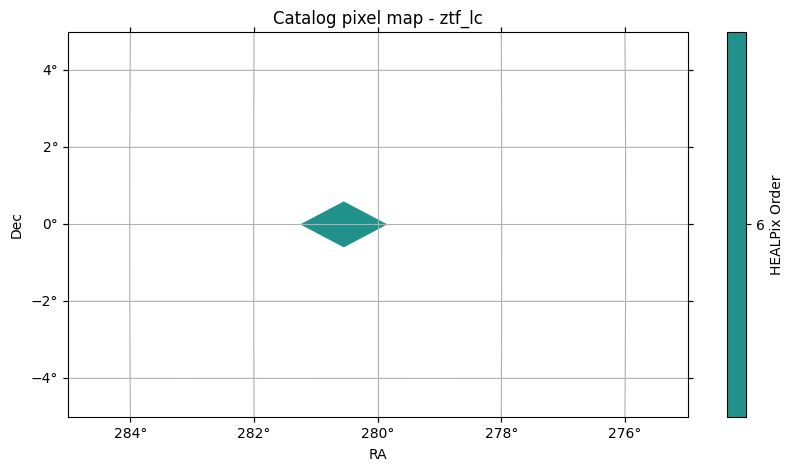

In [12]:
fig, ax = ztf22_sm.plot_pixels(projection="AIT", fov=fov, center=center)

And the points:

1


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia_x_ztf_lc'}>)

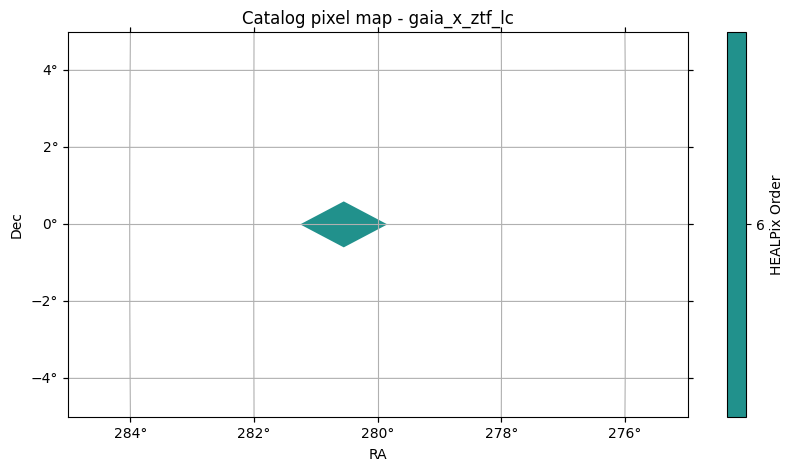

In [13]:
inner = gaia3_sm.crossmatch(ztf22_sm)
print(inner.npartitions)
inner.plot_pixels(projection="AIT", fov=fov, center=center)

6


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - gaia_x_ztf_lc'}>)

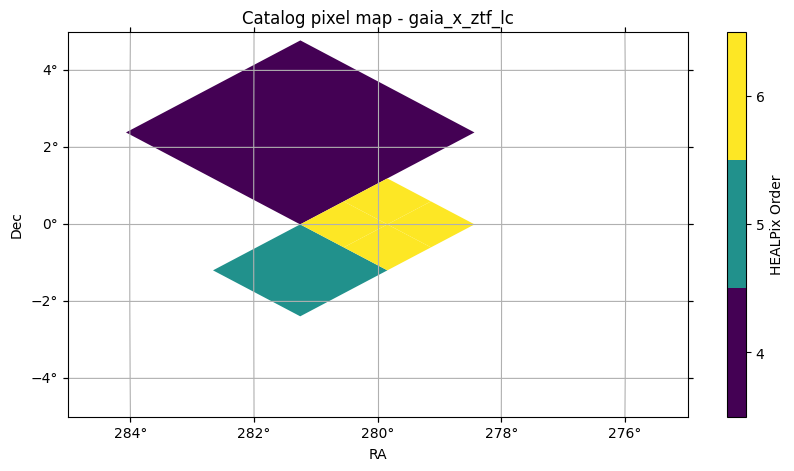

In [14]:
left = gaia3_sm.crossmatch(ztf22_sm, how='left')
print(left.npartitions)
left.plot_pixels(projection="AIT", fov=fov, center=center)